# Supplemental code for the paper 'Body plasticity in sea anemones'

# by Belén García Pascual, University of Bergen

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# 1. Data preparation for feeding intervals

We merge the datasets for body size, cell number and cell size during the feeding period between day 0 and day 10. 
There are some extra data points for body size of individuals whose cell number and cell size were not measured, so we remove those points. We also create new columns for the logarithmic transformation in base e of the measurements of body size, cell number and cell size. The format of the final dataset is in .csv.

In [3]:
#extract the data for body size
df=pd.read_excel('Data/Growth_Body size_cell size_cell number_cell cycle.xlsx', sheet_name='Body size', index_col=0, engine='openpyxl')
df_body=df[["Body_size_in_mm2 "]]
df_day=df[["Day"]]
df_gb=pd.concat([df_day, df_body], axis=1)
df_gb.head()

,Day,Body_size_in_mm2
F_0d_1,0,0.290889
F_0d_2,0,0.324355
F_0d_3,0,0.543924
F_0d_4,0,0.632486
F_0d_5,0,0.290277


In [3]:
len(df_gb.index)

144

In [4]:
#add column 'log body size' with the log transform
log_body = np.log(df_gb.iloc[:, 1]).values
log_body=log_body.tolist()
df_gb['log body size'] = log_body
df_gb.head()

,Day,Body_size_in_mm2,log body size
F_0d_1,0,0.290889,-1.234815
F_0d_2,0,0.324355,-1.125918
F_0d_3,0,0.543924,-0.608946
F_0d_4,0,0.632486,-0.458096
F_0d_5,0,0.290277,-1.236921


In [5]:
#store this dataset as a csv file for simple regression analysis of log body size with respect to day
df_gb.to_csv('Data/body_size_growth_bgp.csv') 

In [6]:
#extract the data for cell number
df=pd.read_excel('Data/Growth_Body size_cell size_cell number_cell cycle.xlsx', sheet_name='Cell number', index_col=0, engine='openpyxl') 
df_d=df[["Day"]]
df_1=df[["Cell number"]]
df_gn=pd.concat([df_d, df_1], axis=1)

#add column 'log cell number' with the log transform
log_cell_num = np.log(df_gn.iloc[:, 1]).values
log_cell_num=log_cell_num.tolist()
df_gn['log cell number'] = log_cell_num
df_gn.head()

,Day,Cell number,log cell number
F_0d_1,0,37500.000000,10.532096
F_0d_3,0,84210.526316,11.341075
F_0d_5,0,31774.193548,10.366410
F_0d_7,0,75414.781297,11.230759
F_0d_10,0,88888.888889,11.395142


In [7]:
len(df_gn.index)

106

In [8]:
#extract the data for cell size
df=pd.read_excel('Data/Growth_Body size_cell size_cell number_cell cycle.xlsx', sheet_name='Cell size', index_col=0, engine='openpyxl') 
df_day=df[["Day"]]
df_m=df[["median"]]
df_gc=pd.concat([df_day, df_m], axis=1)

#add column 'log cell size' with the log transform
log_cell_size = np.log(df_gc.iloc[:, 1]).values
log_cell_size=log_cell_size.tolist()
df_gc['log cell size'] = log_cell_size
df_gc.head()

,Day,median,log cell size
F_0d_1,0,50176,10.823292
F_0d_3,0,43072,10.670628
F_0d_5,0,38976,10.570701
F_0d_7,0,41152,10.625028
F_0d_10,0,34880,10.459669


In [9]:
len(df_gc.index)

106

In [10]:
#merge data frames for body size, cell number and cell size by index
#there are some indices in body size that do not appear in cell number nor size, these rows are removed
df_future_csv=pd.merge(df_gb, df_gn, left_index=True, right_index=True)
df_future_csv=pd.merge(df_future_csv, df_gc, left_index=True, right_index=True)

#we check that the size of the new data frame is as we expected
len(df_future_csv.index)

106

In [11]:
# we check how the new data frame looks
df_future_csv.head()

,Day_x,Body_size_in_mm2,log body size,Day_y,Cell number,log cell number,Day,median,log cell size
F_0d_1,0,0.290889,-1.234815,0,37500.000000,10.532096,0,50176,10.823292
F_0d_3,0,0.543924,-0.608946,0,84210.526316,11.341075,0,43072,10.670628
F_0d_5,0,0.290277,-1.236921,0,31774.193548,10.366410,0,38976,10.570701
F_0d_7,0,0.402102,-0.911050,0,75414.781297,11.230759,0,41152,10.625028
F_0d_10,0,0.434854,-0.832746,0,88888.888889,11.395142,0,34880,10.459669


In [12]:
# we transform the data into a csv file to do regression analysis for log cell number and log cell size
#with respect to day, and for finding correlations between log cell number and size and log body size
df_future_csv.to_csv('Data/nematostella_growth_bgp.csv')

# 2. Data preparation for starvation intervals

As for the case above for feeding, we merge the datasets for body size, cell number and cell size during the starvation period between day 0 and day 21. 
There is one extra data point for body size for a single individual whose cell number and cell size were not measured, so we remove that point. We also create new columns for the logarithmic transformation in base e of the measurements of body size, cell number and cell size. The format of the final dataset is in .csv.

In [13]:
df=pd.read_excel('Data/Degrowth_body size_cell size_cell number_cell cycle.xlsx', sheet_name='Body size', index_col=0, engine='openpyxl')
df_d=df[["Day"]]
df_b=df[["Body_size_in_mm2"]]
df_db=pd.concat([df_d, df_b], axis=1)

log_body = np.log(df_db.iloc[:, 1]).values
log_body=log_body.tolist()
df_db['body size log'] = log_body
df_db.head()

,Day,Body_size_in_mm2,body size log
S_0d_1,0,3.724482,1.314928
S_0d_2,0,5.997642,1.791366
S_0d_3,0,2.923042,1.072625
S_0d_4,0,3.030744,1.108808
S_0d_5,0,3.125799,1.139690


In [14]:
len(df_db.index)

141

In [15]:
df=pd.read_excel('Data/Degrowth_body size_cell size_cell number_cell cycle.xlsx', sheet_name='Cell number', index_col=0, engine='openpyxl')
df_d=df[["Day"]]
df_1=df[["cell number"]]
df_dn=pd.concat([df_d, df_1], axis=1)

log_cell_number= np.log(df_dn.iloc[:, 1]).values
log_cell_number=log_cell_number.tolist()
df_dn['cell number log'] = log_cell_number

len(df_dn.index)

142

In [16]:
df=pd.read_excel('Data/Degrowth_body size_cell size_cell number_cell cycle.xlsx', sheet_name='Cell size', index_col=0, engine='openpyxl')
df_d=df_day=df[["Day"]]
df_m=df[["median"]]
df_dc=pd.concat([df_day, df_m], axis=1)

log_cell_size = np.log(df_dc.iloc[:, 1]).values
log_cell_size=log_cell_size.tolist()
df_dc['cell size log'] = log_cell_size
df_dc.head()

,Day,median,cell size log
S_0d_1,0,63680,11.061626
S_0d_2,0,65280,11.086441
S_0d_3,0,63488,11.058606
S_0d_4,0,55936,10.931963
S_0d_5,0,60288,11.006888


In [17]:
len(df_dc.index)

142

In [18]:
df_future_csv=pd.merge(df_db, df_dn, left_index=True, right_index=True)
df_future_csv=pd.merge(df_future_csv, df_dc, left_index=True, right_index=True)
len(df_future_csv.index)

141

In [19]:
df_future_csv.rename(columns={"body size log": "log body size", "cell number log": "log cell number",
                             "cell size log":"log cell size"}, inplace = True)

In [20]:
df_future_csv.head()

,Day_x,Body_size_in_mm2,log body size,Day_y,cell number,log cell number,Day,median,log cell size
S_0d_1,0,3.724482,1.314928,0,1.193939e+06,13.992769,0,63680,11.061626
S_0d_2,0,5.997642,1.791366,0,1.657906e+06,14.321066,0,65280,11.086441
S_0d_3,0,2.923042,1.072625,0,7.656042e+05,13.548421,0,63488,11.058606
S_0d_4,0,3.030744,1.108808,0,3.237898e+05,12.687850,0,55936,10.931963
S_0d_5,0,3.125799,1.139690,0,5.772662e+05,13.266059,0,60288,11.006888


In [21]:
df_future_csv.drop(columns=["Day_y", "Day_x"])

,Body_size_in_mm2,log body size,cell number,log cell number,Day,median,log cell size
S_0d_1,3.724482,1.314928,1.193939e+06,13.992769,0,63680,11.061626
S_0d_2,5.997642,1.791366,1.657906e+06,14.321066,0,65280,11.086441
S_0d_3,2.923042,1.072625,7.656042e+05,13.548421,0,63488,11.058606
S_0d_4,3.030744,1.108808,3.237898e+05,12.687850,0,55936,10.931963
S_0d_5,3.125799,1.139690,5.772662e+05,13.266059,0,60288,11.006888
...,...,...,...,...,...,...,...
S_21d_20,4.528471,1.510384,1.672907e+05,12.027489,21,36032,10.492163
S_21d_21,4.025761,1.392714,9.070227e+04,11.415338,21,40896,10.618788
S_21d_22,6.354098,1.849100,9.088571e+05,13.719943,21,41024,10.621913
S_21d_23,3.346710,1.207978,3.341501e+05,12.719346,21,44096,10.694124


In [22]:
df_future_csv.to_csv('Data/nematostella_degrowth_bgp.csv')

# 3. Merging of all body size data for growth intervals

We put together:

    1. Body size for feeding 0-10d
    2. Body size for refeeding 170d
    3. Body size for refeeding 200d
    4. Body size for growth in starvation 0-21
        4.1 Either this growth is from day 0 to day 1
        4.2 or from day 0 to day 2. We create two datasets for each choice.

In [23]:
df_1=pd.read_csv('Data/body_size_growth_bgp.csv', index_col=0) 
df_1.head()

,Day,Body_size_in_mm2,log body size
F_0d_1,0,0.290889,-1.234815
F_0d_2,0,0.324355,-1.125918
F_0d_3,0,0.543924,-0.608946
F_0d_4,0,0.632486,-0.458096
F_0d_5,0,0.290277,-1.236921


In [24]:
df_2=pd.read_csv('Data/treatment_170d.csv', index_col=0)
df_3=pd.read_csv('Data/treatment_200d.csv', index_col=0) 
df_4=pd.read_csv('Data/nematostella_degrowth_bgp.csv', index_col=0)
df_4.head()

,Day_x,Body_size_in_mm2,log body size,Day_y,cell number,log cell number,Day,median,log cell size
S_0d_1,0,3.724482,1.314928,0,1.193939e+06,13.992769,0,63680,11.061626
S_0d_2,0,5.997642,1.791366,0,1.657906e+06,14.321066,0,65280,11.086441
S_0d_3,0,2.923042,1.072625,0,7.656042e+05,13.548421,0,63488,11.058606
S_0d_4,0,3.030744,1.108808,0,3.237898e+05,12.687850,0,55936,10.931963
S_0d_5,0,3.125799,1.139690,0,5.772662e+05,13.266059,0,60288,11.006888


In [25]:
df_11=df_1[["Day"]]
df_12=df_1[["log body size"]]
df_1=pd.concat([df_11, df_12], axis=1)
df_1.head()

,Day,log body size
F_0d_1,0,-1.234815
F_0d_2,0,-1.125918
F_0d_3,0,-0.608946
F_0d_4,0,-0.458096
F_0d_5,0,-1.236921


In [26]:
df_21=df_2[["Day"]]
df_22=df_2[["log body size"]]
df_2=pd.concat([df_21, df_22], axis=1)
df_2.head()

,Day,log body size
0,0,-1.259596
1,0,0.068377
2,0,-0.897231
3,0,-2.421077
4,0,-1.391876


In [27]:
df_31=df_3[["Day"]]
df_32=df_3[["log body size"]]
df_3=pd.concat([df_31, df_32], axis=1)

#degrowth
df_41=df_4[["Day"]]
df_42=df_4[["log body size"]]
df_4=pd.concat([df_41, df_42], axis=1)
df_4_02=df_4[df_4["Day"] <= 2]

In [28]:
df_m=pd.concat([df_1,df_2])
df_m.head()

,Day,log body size
F_0d_1,0,-1.234815
F_0d_2,0,-1.125918
F_0d_3,0,-0.608946
F_0d_4,0,-0.458096
F_0d_5,0,-1.236921


In [29]:
df_m=pd.concat([df_m,df_3])
df_m_02=pd.concat([df_m,df_4_02])

In [31]:
#save as csv files
df_m_02.to_csv('Data/all_growth_02.csv')

# 4. Merging of all body size data for degrowth intervals

We put together:

    1. Body size for long starvation (i) 
    2. Body size for long starvation (ii)
    3. Body size for starvation 0-21d:
        3.1 either this degrowth is from day 5 to day 21
        3.2 or from day 2 to day 21. We create two datasets for each choice.

In [32]:
df_1=pd.read_csv('Data/long_starvation_B.csv', index_col=0) 
df_2=pd.read_csv('Data/long_starvation_analogous_B.csv', index_col=0) 
df_3=pd.read_csv('Data/nematostella_degrowth_bgp.csv', index_col=0) 


df_11=df_1[["Day"]]
df_12=df_1[["log body size"]]
df_1=pd.concat([df_11, df_12], axis=1)

df_21=df_2[["Day"]]
df_22=df_2[["log body size"]]
df_2=pd.concat([df_21, df_22], axis=1)

#starvation
df_31=df_3[["Day"]]
df_32=df_3[["log body size"]]
df_3=pd.concat([df_31, df_32], axis=1)

df_3_221=df_3[df_3["Day"] >= 2]

df_m=pd.concat([df_1,df_2])
df_m_221=pd.concat([df_m,df_3_221])

In [33]:
#save as csv files
df_m_221.to_csv('Data/all_degrowth_221.csv')

# 5. Plots and comparisons of confidence intervals of the slope estimates for  each model

The confidence intervals coming from simple linear regression models were computed as the mean estimate +- 2 times the mean standard error. These outputs can be obtained from the R file 'SimpleLinearRegressions.R' (found in this GitHub). The confidence intervals coming from multi-phase, changepoint-models, were computed in the R file 'MultiPhase.R' using the data in 'slopes_boots_updated.csv' for Nematostella and 'slopes_apo_symb.csv' for aiptasia, and these confidence intervals were stored in the data file **'CI_boots.csv'**. Note that the 4-phase models selected for AL and RES were those performed by the custom-written simulated annealing method in C++ (also found in this GitHub), so here we replace the corresponding confidence intervals in 'CI_boots.csv' for these 4 phase models. We manually write the confidence intervals in this section.

 Growth:

In [38]:
# These are the confidence intervals of each slope in each model 
a=[0.265, 0.2944]     #0-10d (single slope)
b=[0.1166, 0.4311]    #b1 AL
c=[0.0219, 0.099]     #b3 AL
d=[0.0938, 0.248]     #b1 RES
e=[0.016, 0.0949]     #b3 RES
f=[-0.13, 0.0037]     #b1 long starvation (ii) 3-phases
g=[0.156, 0.317]      #b1 starvation 0-21d
h=[0.157, 0.207]      #refeeding 170d
i=[0.157, 0.22]       #refeeding 200d 

all_intervals = [a,b,c,d,e,f,g,h,i]

/home/iain/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


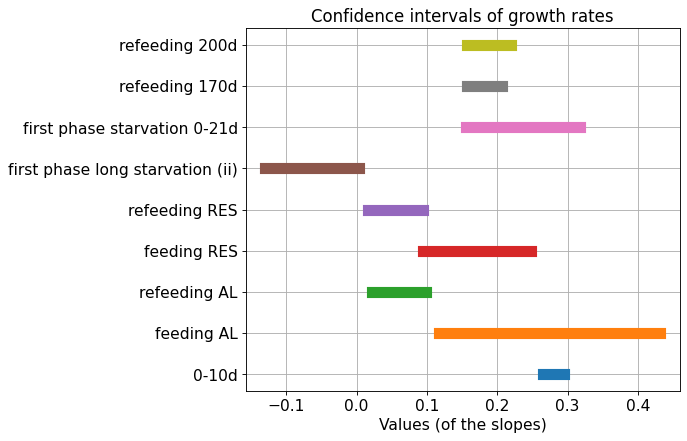

In [39]:
#plot
fig,ax = plt.subplots(figsize = (7,6), dpi = 80)
for i,j in enumerate(all_intervals):
    x_values = [j[0], j[1]]
    y_values = [i+1, i+1]
    plt.plot(x_values, y_values, lw=10, alpha=1)
plt.grid()
plt.title('Confidence intervals of growth rates', fontsize=15)
ax.set_yticklabels( ('ff', '0-10d', 'feeding AL','refeeding AL', 'feeding RES', 'refeeding RES', 'first phase long starvation (ii)', 'first phase starvation 0-21d',
                      'refeeding 170d', 'refeeding 200d' ) )
ax.set_xlabel('Values (of the slopes)', fontsize=14)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.show()

#save figure as svg format
fig.savefig('CI_growth_updates.svg', format='svg', dpi=5000)

Comparison of slopes by seeing when the confidence intervals intersect:

In [40]:
# define the fucntion 'overlaps' that for two intervals a=[a1,a2] and b=[b1,b2]
# returns the range of overlap between a and b, greater than zero, or 
# the distance between a and b, less than zero.
def overlaps(a, b):
    return min(a[1], b[1]) - max(a[0], b[0])

In [41]:
print('a & b', overlaps(all_intervals[0], all_intervals[1]))
print('a & c', overlaps(all_intervals[0], all_intervals[2]))
print('a & d', overlaps(all_intervals[0], all_intervals[3]))
print('a & e', overlaps(all_intervals[0], all_intervals[4]))
print('a & f', overlaps(all_intervals[0], all_intervals[5]))
print('a & g', overlaps(all_intervals[0], all_intervals[6]))
print('a & h', overlaps(all_intervals[0], all_intervals[7]))
print('a & i', overlaps(all_intervals[0], all_intervals[8]))

print('b & c', overlaps(all_intervals[1], all_intervals[2]))
print('b & d', overlaps(all_intervals[1], all_intervals[3]))
print('b & e', overlaps(all_intervals[1], all_intervals[4]))
print('b & f', overlaps(all_intervals[1], all_intervals[5]))
print('b & g', overlaps(all_intervals[1], all_intervals[6]))
print('b & h', overlaps(all_intervals[1], all_intervals[7]))
print('b & i', overlaps(all_intervals[1], all_intervals[8]))

print('c & d', overlaps(all_intervals[2], all_intervals[3]))
print('c & e', overlaps(all_intervals[2], all_intervals[4]))
print('c & f', overlaps(all_intervals[2], all_intervals[5]))
print('c & g', overlaps(all_intervals[2], all_intervals[6]))
print('c & h', overlaps(all_intervals[2], all_intervals[7]))
print('c & i', overlaps(all_intervals[2], all_intervals[8]))

print('d & e', overlaps(all_intervals[3], all_intervals[4]))
print('d & f', overlaps(all_intervals[3], all_intervals[5]))
print('d & g', overlaps(all_intervals[3], all_intervals[6]))
print('d & h', overlaps(all_intervals[3], all_intervals[7]))
print('d & i', overlaps(all_intervals[3], all_intervals[8]))

print('e & f', overlaps(all_intervals[4], all_intervals[5]))
print('e & g', overlaps(all_intervals[4], all_intervals[6]))
print('e & h', overlaps(all_intervals[4], all_intervals[7]))
print('e & i', overlaps(all_intervals[4], all_intervals[8]))

print('f & g', overlaps(all_intervals[5], all_intervals[6]))
print('f & h', overlaps(all_intervals[5], all_intervals[7]))
print('f & i', overlaps(all_intervals[5], all_intervals[8]))

print('g & h', overlaps(all_intervals[6], all_intervals[7]))
print('g & i', overlaps(all_intervals[6], all_intervals[8]))

print('h & i', overlaps(all_intervals[7], all_intervals[8]))

a & b 0.02939999999999998
a & c -0.166
a & d -0.017000000000000015
a & e -0.17010000000000003
a & f -0.26130000000000003
a & g 0.02939999999999998
a & h -0.058000000000000024
a & i -0.04500000000000001
b & c -0.01759999999999999
b & d 0.13140000000000002
b & e -0.021699999999999997
b & f -0.1129
b & g 0.161
b & h 0.04999999999999999
b & i 0.063
c & d 0.00520000000000001
c & e 0.073
c & f -0.0182
c & g -0.056999999999999995
c & h -0.057999999999999996
c & i -0.057999999999999996
d & e 0.0011000000000000038
d & f -0.0901
d & g 0.092
d & h 0.04999999999999999
d & i 0.063
e & f -0.0123
e & g -0.0611
e & h -0.0621
e & i -0.0621
f & g -0.1523
f & h -0.1533
f & i -0.1533
g & h 0.04999999999999999
g & i 0.063
h & i 0.04999999999999999


Degrowth:

In [42]:
a=[-0.033,-0.013]      #0-21 slope b2
b=[-0.02997,-0.0133]   #b2 AL
c=[-0.02739,-0.0175]   #b4 AL
d=[-0.051,-0.0277]     #b2 RES
e=[-0.03,-0.012]       #b4 RES
f=[-0.0174,-0.0166]    #long starvation B
g=[-0.0373,0.00168]    #long starv an B 3-phases b2

all_intervals = [a,b,c,d,e,f,g]

/home/iain/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


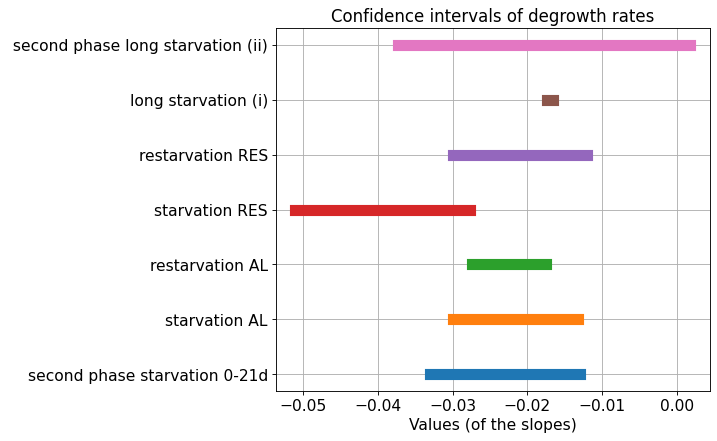

In [43]:
fig,ax = plt.subplots(figsize = (7,6), dpi = 80)
for i,j in enumerate(all_intervals):
    x_values = [j[0], j[1]]
    y_values = [i+1, i+1]
    plt.plot(x_values, y_values, lw=10, alpha=1)
plt.grid()
plt.title('Confidence intervals of degrowth rates', fontsize=15)
ax.set_xlabel('Values (of the slopes)', fontsize=14)
#plt.yticks
ax.set_yticklabels( ('ff', 'second phase starvation 0-21d', 'starvation AL','restarvation AL', 'starvation RES', 'restarvation RES', 'long starvation (i)', ' second phase long starvation (ii)',
                      ) )
#ax.legend(['First line', 'Second line'])
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.show()

#save figure as svg form
fig.savefig('CI_degrowth_updates.svg', format='svg', dpi=5000)

Comparison of slopes by seeing when the confidence intervals intersect, as for the growth case above:

In [44]:
print('a & b', overlaps(all_intervals[0], all_intervals[1]))
print('a & c', overlaps(all_intervals[0], all_intervals[2]))
print('a & d', overlaps(all_intervals[0], all_intervals[3]))
print('a & e', overlaps(all_intervals[0], all_intervals[4]))
print('a & f', overlaps(all_intervals[0], all_intervals[5]))
print('a & g', overlaps(all_intervals[0], all_intervals[6]))

print('b & c', overlaps(all_intervals[1], all_intervals[2]))
print('b & d', overlaps(all_intervals[1], all_intervals[3]))
print('b & e', overlaps(all_intervals[1], all_intervals[4]))
print('b & f', overlaps(all_intervals[1], all_intervals[5]))
print('b & g', overlaps(all_intervals[1], all_intervals[6]))

print('c & d', overlaps(all_intervals[2], all_intervals[3]))
print('c & e', overlaps(all_intervals[2], all_intervals[4]))
print('c & f', overlaps(all_intervals[2], all_intervals[5]))
print('c & g', overlaps(all_intervals[2], all_intervals[6]))

print('d & e', overlaps(all_intervals[3], all_intervals[4]))
print('d & f', overlaps(all_intervals[3], all_intervals[5]))
print('d & g', overlaps(all_intervals[3], all_intervals[6]))

print('e & f', overlaps(all_intervals[4], all_intervals[5]))
print('e & g', overlaps(all_intervals[4], all_intervals[6]))

print('f & g', overlaps(all_intervals[5], all_intervals[6]))

a & b 0.01667
a & c 0.00989
a & d 0.005300000000000003
a & e 0.017
a & f 0.0007999999999999986
a & g 0.020000000000000004
b & c 0.00989
b & d 0.002270000000000001
b & e 0.01667
b & f 0.0007999999999999986
b & g 0.01667
c & d -0.0003099999999999978
c & e 0.00989
c & f -0.00010000000000000286
c & g 0.00989
d & e 0.0023
d & f -0.0103
d & g 0.009600000000000001
e & f 0.0007999999999999986
e & g 0.018
f & g 0.0007999999999999986


# 6. Merging all datasets of slope estimates into one. These estimates come from bootstrapping  the multiphase models in R

In [4]:
#body size long starvation (ii) or analogous B
df1=pd.read_csv('Precomputed/df1_m3.csv', index_col=0)           
#body size starvation 0-21d
df2=pd.read_csv('Precomputed/df2_m2.csv', index_col=0)        
#cell number starvation 0-21d
df3=pd.read_csv('Precomputed/df3_m2.csv', index_col=0)        
#cell size starvation 0-21d
df4=pd.read_csv('Precomputed/df4_m3.csv', index_col=0)
#cyclic AL
df5=pd.read_csv('Precomputed/df5_m4.csv', index_col=0)
#cyclic RES
df6=pd.read_csv('Precomputed/df6_m4.csv', index_col=0)

In [5]:
df=pd.merge(df1, df2, left_index=True, right_index=True)
df=pd.merge(df, df3, left_index=True, right_index=True)
df=pd.merge(df, df4, left_index=True, right_index=True)
df=pd.merge(df, df5, left_index=True, right_index=True)
df=pd.merge(df, df6, left_index=True, right_index=True)
df.head()

,b_1.long.starvation..ii.,b_2.long.starvation..ii.,b_3.long.starvation..ii.,b_1.0.21d,b_2.0.21d,b_1.0.21d.cell.number,b_2.0.21d.cell.number,b_1.0.21d.cell.size,b_2.0.21d.cell.size,b_3.0.21d.cell.size,b_1.AL,b_2.AL,b_3.AL,b_4.AL,b_1.RES,b_2.RES,b_3.RES,b_4.RES
1,-0.027329,-0.031928,0.000642,0.239245,-0.023181,0.404205,-0.101069,0.071222,-0.043985,0.028112,0.246731,-0.023099,0.061858,-0.023098,0.174226,-0.028311,0.087373,-0.026073
2,-0.033678,-0.033907,-0.001860,0.209144,-0.023398,0.310906,-0.110579,0.202864,-0.039855,0.066872,0.275296,-0.016455,0.078814,-0.021288,0.153773,-0.036541,0.044646,-0.022507
3,-0.021791,-0.009904,-0.002564,0.267222,-0.015846,0.260749,-0.100873,0.064930,-0.075486,-0.004563,0.295530,-0.017143,0.093204,-0.020192,0.215557,-0.038851,0.034442,-0.019473
4,-0.096626,-0.028727,0.000350,0.174805,-0.017327,0.650255,-0.093764,0.021994,-0.046452,0.020608,0.303442,-0.019965,0.088327,-0.022242,0.220914,-0.041160,0.046535,-0.025138
5,-0.029640,-0.012192,0.004276,0.360879,-0.031871,0.255702,-0.090256,0.064878,-0.042973,0.040886,0.210844,-0.020112,0.040866,-0.022308,0.232320,-0.036930,0.064590,-0.018191


In [6]:
#save as csv file
df.to_csv('Data/slopes_boots_updated.csv')

Re-format the data frame above so that we can plot the data as distibutions in the same x-axis in R:

In [7]:
df_reseted=pd.DataFrame(df.stack().reset_index(level=0,drop=True))
df_reseted.columns=["Boots value"]
df_reseted.head()

,Boots value
b_1.long.starvation..ii.,-0.027329
b_2.long.starvation..ii.,-0.031928
b_3.long.starvation..ii.,0.000642
b_1.0.21d,0.239245
b_2.0.21d,-0.023181


In [8]:
axes_to_colum=df_reseted.index
list_axes=df_reseted.index.tolist()
df_reseted['Legend']=list_axes
df_reseted.head()

,Boots value,Legend
b_1.long.starvation..ii.,-0.027329,b_1.long.starvation..ii.
b_2.long.starvation..ii.,-0.031928,b_2.long.starvation..ii.
b_3.long.starvation..ii.,0.000642,b_3.long.starvation..ii.
b_1.0.21d,0.239245,b_1.0.21d
b_2.0.21d,-0.023181,b_2.0.21d


In [ ]:
#save as csv file
df_reseted.to_csv('Data/slopes_boots_newformat_updated.csv')

# 7. Computation of the mean and 2 times the standard error of the slope distributions from bootstrapping the multi-phase models in R

In [ ]:
# For an interval [a,b], return the mean and the distance from the mean to the endpoints of the interval
# this last distance corresponds to 2 times the standard error.
def m(a,b):
    mean=(a+b)/2
    two_times_se=mean-a
    return (mean, two_times_se)

In [ ]:
print(m(0.156, 0.317))       #b1 body 0-21d
print(m(-0.033, -0.013))     #b2 body 0-21d
print(m(0.2, 0.68))          #b1 cell number 0-21d
print(m(-0.125, -0.078))     #b2 cell number 0-21d
print(m(-0.018, 0.213))      #b1 cell size 0-21d
print(m(-0.067, -0.031))     #b2 cell size 0-21d
print(m(-0.011, 0.13))       #b3 cell size 0-21d
print(m(-0.013, 0.0037))     #b1 long ii
print(m(-0.0373, 0.00168))   #b2 long ii
print(m(-0.011, 0.0157))     #b3 long ii
print(m(0.1166, 0.4311))     #b1 AL
print(m(-0.02997, -0.0133))  #b2 AL
print(m(0.0219, 0.099))      #b3 AL
print(m(-0.02739, -0.0175))  #b4 AL
print(m(0.0938, 0.248))      #b1 RES
print(m(-0.051, -0.0277))    #b2 RES
print(m(0.016, 0.0949))      #b3 RES
print(m(-0.03, -0.012))      #b4 RES

(0.2365, 0.08049999999999999)
(-0.023, 0.010000000000000002)
(0.44000000000000006, 0.24000000000000005)
(-0.1015, 0.023499999999999993)
(0.0975, 0.1155)
(-0.049, 0.018000000000000002)
(0.059500000000000004, 0.07050000000000001)
(-0.00465, 0.00835)
(-0.01781, 0.01949)
(0.0023499999999999997, 0.013349999999999999)
(0.27385, 0.15725)
(-0.021635, 0.008334999999999999)
(0.060450000000000004, 0.03855)
(-0.022445, 0.0049450000000000015)
(0.1709, 0.0771)
(-0.039349999999999996, 0.01165)
(0.05545, 0.03945)
(-0.020999999999999998, 0.009000000000000001)


# 8. Aiptasia data

 Preparation of the data in csv files with a column for the log transform:

In [ ]:
#extract the data for body size
#columns separated by \, decimal numbers written by , instead of . (which is interpreted as a string
# instead of as a float if we do not transform it)
df=pd.read_csv('Data/longer-starved_aiptasia.txt', delimiter='\s+', decimal=",")
df.head()

,day,symbiosis,individual,name,pxl,mm2,condition
0,0,apo,p1,1,18092,3.99,fed
1,0,apo,p1,2,16930,3.73,fed
2,0,apo,p1,3,16083,3.54,fed
3,0,apo,p1,4,14522,3.20,fed
4,0,apo,p1,5,12001,2.64,fed


In [ ]:
#add column for the log transforms of mm2
log_body = np.log(df.iloc[:, 5]).values
log_body=log_body.tolist()
df['log body size'] = log_body
df.head()

,day,symbiosis,individual,name,pxl,mm2,condition,log body size
0,0,apo,p1,1,18092,3.99,fed,1.383791
1,0,apo,p1,2,16930,3.73,fed,1.316408
2,0,apo,p1,3,16083,3.54,fed,1.264127
3,0,apo,p1,4,14522,3.20,fed,1.163151
4,0,apo,p1,5,12001,2.64,fed,0.970779


In [ ]:
#Separate apo from sym
df_apo=df.loc[df['symbiosis'] == 'apo']
df_symb=df.loc[df['symbiosis'] == 'sym']

#save as csv files
df_apo.to_csv('Data/apo.csv')
df_symb.to_csv('Data/symb.csv')

Prepare the outputs of slope values from bootstrapping in R:

In [ ]:
#outputs slopes boots
df1=pd.read_csv('Data/apo_300.csv', index_col=0)
df2=pd.read_csv('Data/symb_300.csv', index_col=0)

df=pd.merge(df1, df2, left_index=True, right_index=True)
df.head()

,b_1.apo,b_2.apo,b_1.symb,b_2.symb
1,0.193148,-0.025129,0.213395,-0.007480
2,0.173310,-0.024321,0.139210,-0.009910
3,0.213494,-0.025311,0.208915,-0.007869
4,0.175327,-0.024605,0.149353,-0.017770
5,0.200203,-0.023731,0.224535,-0.006843


In [ ]:
#save as csv file
df.to_csv('Data/slopes_apo_symb.csv')

In [ ]:
#reformat the dataframe for further plotting and analysis in R
df_reseted=pd.DataFrame(df.stack().reset_index(level=0,drop=True))
df_reseted.columns=["Boots value"]
axes_to_colum=df_reseted.index
list_axes=df_reseted.index.tolist()
df_reseted['Legend']=list_axes
df_reseted.head()

,Boots value,Legend
b_1.apo,0.193148,b_1.apo
b_2.apo,-0.025129,b_2.apo
b_1.symb,0.213395,b_1.symb
b_2.symb,-0.007480,b_2.symb
b_1.apo,0.173310,b_1.apo


In [ ]:
#save as csv
df_reseted.to_csv('Data/slopes_apo_symb_newformat.csv')

Plot confidence intervals as bars and compute their overlap:

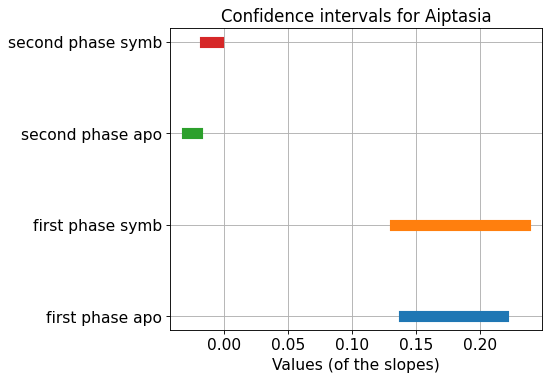

In [ ]:
b1_apo=[0.14, 0.218]
b2_apo=[-0.0289, -0.021]
b1_symb=[0.133, 0.235]
b2_symb=[-0.015, -0.00458]

all_intervals = [b1_apo,b1_symb,b2_apo, b2_symb]

fig,ax = plt.subplots(figsize = (6,5), dpi = 80)
y_values=[]
for i,j in enumerate(all_intervals):
    x_values = [j[0], j[1]]
    y_values = [i, i]
    plt.plot(x_values, y_values, lw=10, alpha=1)
plt.grid()
plt.yticks(np.arange(0, len(all_intervals), 1.0))
plt.title('Confidence intervals for Aiptasia', fontsize=15)
ax.set_xlabel('Values (of the slopes)', fontsize=14)
ax.set_yticklabels( ('first phase apo', 'first phase symb','second phase apo', 'second phase symb') )
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14)
plt.show()

#save as svg
fig.savefig('CI_aiptasia.svg', format='svg', dpi=5000)